# Finding the Scaling Relations 

* All the expressions are symbolically evaluated in the [model_generator.py](https://github.com/Rnazx/Scaling-Relations/blob/master/model_generator.py) file using the model_gen_regime function.

* The following are the steps needed to find the scaling relations. The instructions below are given in the order of the blocks of code.

* The model corresponding to each regime is described as follows

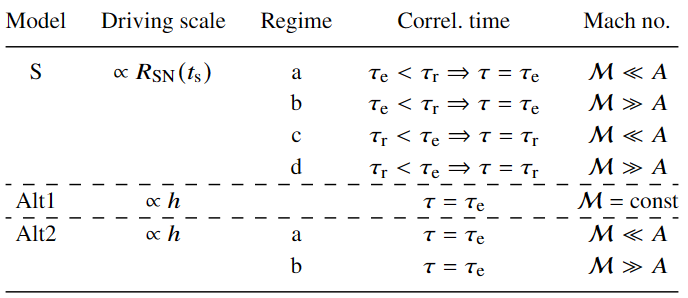


### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
from ipywidgets import interact, interactive

### Define Symbols involved
We need these symbols to substitute the physical constants' values into the final expressions.

In [2]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mu0 = Symbol('Mu_0')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')
bet = Symbol('beta')
alphak = Symbol('alpha_k')
Gamma = Symbol('Gamma')
eta = Symbol('eta')
Nsb = Symbol('N_sb')

### Constants involved

In [3]:
# conversion factors used to convert all quantities to cgs units for consistency
g_Msun = 1.989e33  # solar mass in g
cgs_G = 6.674e-8  # gravitational constant in cgs units
g_mH = 1.6736e-24  # mass of hydrogen atom in grams
cgs_kB = 1.3807e-16  # boltzmann constant in cgs units

# Reading the Constant values
gval, clval, xioval, mstarval, deltaval, e51val, kaval, Gammaval, Caval, Rkval, muval, mu0val, etaval = tuple(
    np.genfromtxt('constants.in', delimiter='=', dtype=np.float64)[:, -1])

# List of tuples for substituting the values in the symbol. 
# The firt element of each tuple is the symbol for which the value needs to be substituted
# The second element is the numerical value which is stored in constants.in file
const = [(boltz, cgs_kB), (mh, g_mH), (G, cgs_G), (gamma, gval),
         (calpha, Caval), (Rk, Rkval), (mu, muval), (cl,
                                               clval), (xio, xioval), (mstar, mstarval*g_Msun),
         (delta, deltaval), (E51, e51val), (kalpha, kaval), (Gamma, Gammaval), (mu0, mu0val), (eta, etaval)]

### Choose the model

In [4]:
def myf(h, l, u, t, alpha):
    return h, l, u, t, alpha


y = interactive(myf, h=[r'subsonic', r'supersonic', r'cs/omega'],
                l=[r'maximum scale-driven', r'isolated supernovae-driven', r'superbubble-driven'],
                u=[r'sound speed', r'supenovae/superbubble-driven'],
                t=[r'eddy turnover time', r'supernovae/superbubble renovation time'],
                alpha=['regime 1', 'regime 2', 'regime 3'])#regime
y

interactive(children=(Dropdown(description='h', options=('subsonic', 'supersonic', 'cs/omega'), value='subsoni…

In [11]:
hreg, lreg, ureg, taureg, alphareg = y.result
lreg

'superbubble-driven'

* The model_gen_regime() function takes in the regimes for the scale height h, correlation length l, velocity dispersion u, correlation time $\tau$ and $\alpha_k$ described in the manuscript. 
* This function is then used to find the expressions per the chosen regime. 

In [12]:
# conversion factors
pc_kpc = 1e3  # number of pc in one kpc
cm_kpc = 3.086e+21  # number of centimeters in one parsec
cm_km = 1e5  # number of cm in one km
s_Myr = 1e+6*(365*24*60*60)  # number of seconds in one megayear

from model_generator import model_gen, model_gen_regime
#quantities = model_gen(model_no, let, not_ren)
quantities = model_gen_regime(hreg, lreg, ureg, taureg, alphareg='regime 1')

 Use [python file](model_generator.py)

### Quantity for which the scaling relations are required

In [13]:
def myfunc(quantity):
    return quantity

quantity_string = ['h', 'l', 'u', 'tau',
                   'biso', 'bani', 'Bbar', 'tanpB', 'tanpb']
quan_interact = interactive(myfunc, quantity=quantity_string)
quan_interact

interactive(children=(Dropdown(description='quantity', options=('h', 'l', 'u', 'tau', 'biso', 'bani', 'Bbar', …

In [14]:
idx = quantity_string.index(quan_interact.result)
quantities[idx]

5.6418393595424e+32*pi**(2/9)*(C_l*E_51**(4/3)*N_sb**(1/3)*Sigma_SFR*\delta*eta**(4/3)*m_H*mu*(Gamma - 1)/(Gamma*\Sigma*m_**(T*gamma*k_B/(m_H*mu))**(1/3)*(G*Sigma_tot*\Sigma/(T*gamma*k_B))**(1/3)))**(1/3)

### Find and plot the scaling relations

The scaling relation is 


N_sb**0.11*Sigma_SFR**0.33/(Sigma_tot**0.11*\Sigma**0.44)

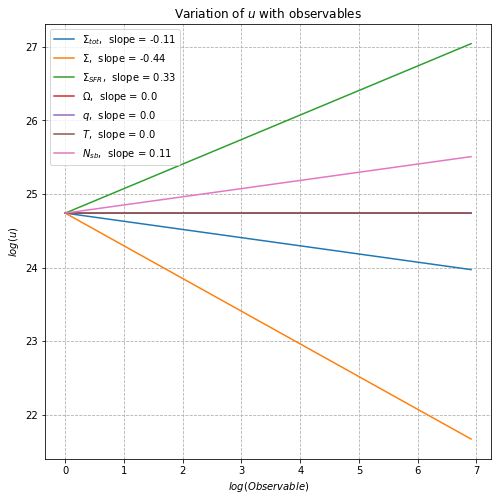

In [15]:
s = quantity_string[idx]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
             (omega, 1), (q, 1), (T, 1), (Nsb, 1)]
# quantity to be plotted
final_quantity = quantities[idx]
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
var = np.linspace(1, 1000, 5000)
# plotting the scaling relations
plt.figure(figsize=(8, 8))
power = []
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                 (omega, 1), (q, 1), (T, 1), (Nsb, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = final_quantity.subs(final)
    zf = [z.evalf(subs={obs: i}) for i in var]
    zf = np.array(np.float64(zf))
    if idx == 7:
        zf = -zf
    po = str(np.round(np.float64((diff(log(z), obs)*obs).subs(obs, 1)), 2))
    power.append(float(po))
    plt.plot(np.log(var), np.log(zf), label='$' +
             str(latex(obs))+'$,  slope = '+po)
plt.title('Variation of $'+s+'$ with observables')
plt.xlabel('$log(Observable)$')
plt.ylabel('$log('+s+')$')
plt.grid(True, which="both", ls="--")
plt.legend()

scaling = np.power(observ, power)
relation = 1
for i in scaling:
    relation *= i

print('The scaling relation is ')
relation
# plt.savefig('scal'+s+str(model_no)+let+'.png')

### Converting the regimes to model number and letter according to the paper

In [ ]:

let = 'a'
not_ren = True
if lreg == 'maximum scale driven':
    if ureg == 'sound speed':
        model_no = 1
    else:
        model_no = 2
elif ureg != 'sound speed':
    if hreg == 'cs/omega':
        model_no = 4
    else:
        model_no = 3
else:
    print('Supernovae correlation length cannot have sound speed as the correlation velocity')

try:
    if model_no != 1:
        if hreg == 'subsonic':
            let = 'a'
        elif hreg == 'supersonic':
            let = 'b'
    else:
        print('Subsonic or supersonic regime not applicable for this model.')
    if [3, 4].count(model_no) > 0:
        if taureg == 'eddy turnover time':
            not_ren = True
        else:
            not_ren = False
            if let == 'a': let = 'c'
            else : let = 'd'
    else:
        print('Supernova renovation time not applicable for this model')
except NameError:
    print('******************************************************************************')
    print('Change the model combination')
    print('******************************************************************************')


### Displaying the model number and letter

In [ ]:
model_no, let

(3, 'a')